# CONEXIONES E IMPORTACIONES

In [328]:
# Para tratamiento de datos
import pandas as pd
import numpy as np
import re #para llamar a Expresiones Regulares y estandarizar el nombre de las columnas.

# Para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Para poder visualizar todas las columnas de los DataFrames
pd.set_option('display.max_columns', None) 

# Trabajar con el sistema operativo y variables de entorno
import os 
from dotenv import load_dotenv

# Conexión con MySQL
import mysql.connector
from mysql.connector import Error

# Gestión de los warnings
import warnings
warnings.filterwarnings("ignore")

df_hr = pd.read_csv("./datasets/hr.csv")

## Columnas del Dataset

| Columna | Descripción |
| :--- | :--- |
| **Age** | Edad del empleado. |
| **Attrition** | Indica si el empleado dejó la empresa (**Yes/No**). |
| **BusinessTravel** | Frecuencia de viajes laborales (ej. Travel_Rarely, Travel_Frequently). |
| **DailyRate** | Tarifa diaria estimada basada en el salario. |
| **Department** | Departamento en el que trabaja el empleado. |
| **DistanceFromHome** | Distancia desde el hogar hasta el lugar de trabajo. |
| **Education** | Nivel educativo representado en una escala numérica. |
| **EducationField** | Campo o área de estudios del empleado. |
| **EmployeeCount** | Valor constante (normalmente 1), indica un empleado por registro. |
| **EmployeeNumber** | Identificador único del empleado. |
| **EnvironmentSatisfaction** | Nivel de satisfacción con el entorno laboral. |
| **Gender** | Género del empleado. |
| **HourlyRate** | Tarifa por hora estimada. |
| **JobInvolvement** | Nivel de implicación del empleado en su trabajo. |
| **JobLevel** | Nivel jerárquico del puesto. |
| **JobRole** | Rol o puesto específico del empleado. |
| **JobSatisfaction** | Nivel de satisfacción con el trabajo. |
| **MaritalStatus** | Estado civil del empleado. |
| **MonthlyIncome** | Ingreso mensual estimado. |
| **MonthlyRate** | Tarifa mensual estimada. |
| **NumCompaniesWorked** | Número de empresas en las que ha trabajado previamente. |
| **Over18** | Indica si el empleado es mayor de 18 años. |
| **OverTime** | Indica si el empleado realiza horas extra (**Yes/No**). |
| **PercentSalaryHike** | Porcentaje de incremento salarial. |
| **PerformanceRating** | Evaluación del desempeño del empleado. |
| **RelationshipSatisfaction** | Nivel de satisfacción con las relaciones laborales. |
| **StandardHours** | Horas estándar de trabajo. |
| **StockOptionLevel** | Nivel de opciones sobre acciones asignadas. |
| **TotalWorkingYears** | Total de años de experiencia laboral. |
| **TrainingTimesLastYear** | Número de formaciones recibidas en el último año. |
| **WorkLifeBalance** | Nivel de equilibrio entre vida personal y laboral. |
| **YearsAtCompany** | Años que el empleado lleva en la empresa. |
| **YearsInCurrentRole** | Años en el rol actual. |
| **YearsSinceLastPromotion** | Años transcurridos desde la última promoción. |
| **YearsWithCurrManager** | Años trabajando con el gerente actual. |

# EDA

Fase 1: Análisis Exploratorio de Datos(EDA).

Antes de llevar a cabo el proyecto es crucial comprender mejor el conjunto de datos y sus características. Para ello deberás hacer un análisis exploratorio detallado del conjunto de datos para familiarizarte con ellos y entender que información tenemos.

1. ✔ - Estandarizar nombre columnas
2. ✔ - eliminar duplicados (EmployeeNumber)
3. ✔ - borrar "EmployeeCount"
4. ✔ - revisar tipo datos
5. "Education" + "EducationField" - > revisar
6. ✔ - valorar cambiar los nombres de valores en según que columnas ("RelationshipSatisfaction", "PerformanceRating", )
7. Revisar nulos ("StandardHours")
8. ✔ - estandarizar columna "JobRole"


In [329]:
df_hr.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,sALES eXECUTIVE,4.0,Single,5993.0,19479,8,Y,Yes,11,3,1,80.0,0,8,0.0,1,6,4,0,5.0
1,49.0,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,rESEARCH sCIENTIST,2.0,Married,5130.0,24907,1,Y,No,23,4,4,NaN,1,10,3.0,3,10,7,1,7.0


In [330]:
df_hr.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1401.0,36.944325,9.105009,18.0,30.00,36.0,43.00,60.0
DailyRate,1474.0,802.702171,403.539530,102.0,465.00,803.0,1157.00,1499.0
DistanceFromHome,1474.0,9.199457,8.104266,1.0,2.00,7.0,14.00,29.0
Education,1474.0,2.911126,1.024267,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1474.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1474.0,1024.471506,602.421193,1.0,488.75,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1474.0,2.723881,1.093280,1.0,2.00,3.0,4.00,4.0
HourlyRate,1474.0,65.887381,20.310444,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1474.0,2.729986,0.712861,1.0,2.00,3.0,3.00,4.0
JobLevel,1474.0,2.063772,1.106055,1.0,1.00,2.0,3.00,5.0


In [331]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474 entries, 0 to 1473
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1401 non-null   float64
 1   Attrition                 1474 non-null   object 
 2   BusinessTravel            1357 non-null   object 
 3   DailyRate                 1474 non-null   int64  
 4   Department                1445 non-null   object 
 5   DistanceFromHome          1474 non-null   int64  
 6   Education                 1474 non-null   int64  
 7   EducationField            1416 non-null   object 
 8   EmployeeCount             1474 non-null   int64  
 9   EmployeeNumber            1474 non-null   int64  
 10  EnvironmentSatisfaction   1474 non-null   int64  
 11  Gender                    1474 non-null   object 
 12  HourlyRate                1474 non-null   int64  
 13  JobInvolvement            1474 non-null   int64  
 14  JobLevel

## Estandarización columnas

In [332]:
# Hay valores numéricos de grados de interpretación, los actualizamos para que sea más visual.
# Usamos una función para las variables que muestran los mismos niveles y para las que tienen valores únicos respecto al resto de columnas las hacemos 1:1

def cat_low_veryhigh(col):
    niveles = {
        1: "Low",
        2: "Medium",
        3: "High",
        4: "Very High"}
    df_hr[col] = df_hr[col].replace(niveles)

In [333]:
columnas_a_cambiar = ["EnvironmentSatisfaction", "JobInvolvement", "JobSatisfaction", "RelationshipSatisfaction"]

cat_low_veryhigh(columnas_a_cambiar)

In [334]:
for fi in df_hr["WorkLifeBalance"]:
        niveles = {
              1: "Bad",
              2: "Good",
              3: "Better",
              4: "Best"  
        }
        df_hr["WorkLifeBalance"] = df_hr["WorkLifeBalance"].replace(niveles)

In [335]:
for fi in df_hr["Education"]:
        niveles = {
              1: "Below College",
              2: "College",
              3: "Bachelor",
              4: "Master",
              5: "Doctor"
        }
        df_hr["Education"] = df_hr["Education"].replace(niveles)

In [336]:
for fi in df_hr["PerformanceRating"]:
        niveles = {
              1: "Low",
              2: "Good",
              3: "Excellent",
              4: "Outstanding"
        }
        df_hr["PerformanceRating"] = df_hr["PerformanceRating"].replace(niveles)

In [337]:
df_hr["MonthlyIncome"].unique()

array([5993., 5130., 2090., ..., 9991., 5390., 4404.], shape=(1337,))

In [338]:
def corregir_enteros_disfrazados(df):
    cols_float = df.select_dtypes(include=['float64', 'float']).columns
    
    for col in cols_float:
        # Solo comprobamos los valores NO nulos
        if not (df[col].dropna() % 1 != 0).any():
            df[col] = df[col].astype('Int64')
            print(f"Columna '{col}' convertida a entero.")

In [339]:
corregir_enteros_disfrazados(df_hr)

Columna 'Age' convertida a entero.
Columna 'MonthlyIncome' convertida a entero.
Columna 'StandardHours' convertida a entero.
Columna 'TrainingTimesLastYear' convertida a entero.
Columna 'YearsWithCurrManager' convertida a entero.


In [340]:
df_hr.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,Medium,Female,94,High,2,sALES eXECUTIVE,Very High,Single,5993,19479,8,Y,Yes,11,Excellent,Low,80,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,High,Male,61,Medium,2,rESEARCH sCIENTIST,Medium,Married,5130,24907,1,Y,No,23,Outstanding,Very High,<NA>,1,10,3,Better,10,7,1,7


In [341]:
def estandarizar_todo(df):
    # 1. Limpiar los nombres de las COLUMNAS
    # Pasamos de 'BusinessTravel' -> 'Business Travel' -> 'business_travel'
    import re
    
    def limpiar_nombre(nombre):
        # Insertar espacio antes de mayúsculas (para separar PascalCase)
        nombre = re.sub(r'(?<!^)(?=[A-Z])', ' ', nombre)
        # Limpiar guiones bajos previos, pasar a minúsculas y quitar espacios extra
        return nombre.replace('_', ' ').lower().strip().replace(' ', '_')

    df.columns = [limpiar_nombre(col) for col in df.columns]

    # 2. Limpiar el CONTENIDO de las filas (solo columnas de texto)
    cols_texto = df.select_dtypes(include=['object']).columns
    
    for col in cols_texto:
        df[col] = (df[col]
                   .str.replace("_", " ", regex=False)
                   .str.title()
                   .str.strip())
    
    return df

# Aplicar al DF
df_hr = estandarizar_todo(df_hr)

In [342]:
# Localizamos errata en la columna de Marital Status, y se corrige usando .loc

df_hr.loc[df_hr['marital_status'] == 'Marreid', 'marital_status'] = 'Married'

## Nulos

In [343]:
df_hr.isnull().sum() 

age                            73
attrition                       0
business_travel               117
daily_rate                      0
department                     29
distance_from_home              0
education                       0
education_field                58
employee_count                  0
employee_number                 0
environment_satisfaction        0
gender                          0
hourly_rate                     0
job_involvement                 0
job_level                       0
job_role                        0
job_satisfaction               29
marital_status                132
monthly_income                 14
monthly_rate                    0
num_companies_worked            0
over18                          0
over_time                      44
percent_salary_hike             0
performance_rating              0
relationship_satisfaction       0
standard_hours                164
stock_option_level              0
total_working_years             0
training_times

In [344]:
df_hr.isna().sum()/df_hr.shape[0]*100

age                            4.952510
attrition                      0.000000
business_travel                7.937585
daily_rate                     0.000000
department                     1.967436
distance_from_home             0.000000
education                      0.000000
education_field                3.934871
employee_count                 0.000000
employee_number                0.000000
environment_satisfaction       0.000000
gender                         0.000000
hourly_rate                    0.000000
job_involvement                0.000000
job_level                      0.000000
job_role                       0.000000
job_satisfaction               1.967436
marital_status                 8.955224
monthly_income                 0.949796
monthly_rate                   0.000000
num_companies_worked           0.000000
over18                         0.000000
over_time                      2.985075
percent_salary_hike            0.000000
performance_rating             0.000000


In [345]:
df_hr["years_with_curr_manager"] = df_hr["years_with_curr_manager"].fillna(df_hr["years_with_curr_manager"].median())
df_hr["standard_hours"] = df_hr["standard_hours"].fillna(df_hr["standard_hours"].median())


In [346]:
#confirmamos cambios en "years_with_curr_manager" y "standard_hours"
df_hr.isna().sum()/df_hr.shape[0]*100

age                           4.952510
attrition                     0.000000
business_travel               7.937585
daily_rate                    0.000000
department                    1.967436
distance_from_home            0.000000
education                     0.000000
education_field               3.934871
employee_count                0.000000
employee_number               0.000000
environment_satisfaction      0.000000
gender                        0.000000
hourly_rate                   0.000000
job_involvement               0.000000
job_level                     0.000000
job_role                      0.000000
job_satisfaction              1.967436
marital_status                8.955224
monthly_income                0.949796
monthly_rate                  0.000000
num_companies_worked          0.000000
over18                        0.000000
over_time                     2.985075
percent_salary_hike           0.000000
performance_rating            0.000000
relationship_satisfaction

## Duplicados

In [347]:
# Se localizan 4 duplicados, resolveremos más adelante de qué se tratan y se valorarán borrarlos.
df_hr.duplicated().sum()

np.int64(4)

In [348]:
duplicados_por_columna = df_hr.apply(lambda x: x.duplicated().sum())

print(duplicados_por_columna)

age                           1430
attrition                     1472
business_travel               1470
daily_rate                     588
department                    1470
distance_from_home            1445
education                     1469
education_field               1467
employee_count                1473
employee_number                  4
environment_satisfaction      1470
gender                        1472
hourly_rate                   1403
job_involvement               1470
job_level                     1469
job_role                      1465
job_satisfaction              1469
marital_status                1470
monthly_income                 137
monthly_rate                    47
num_companies_worked          1464
over18                        1473
over_time                     1471
percent_salary_hike           1459
performance_rating            1472
relationship_satisfaction     1470
standard_hours                1473
stock_option_level            1470
total_working_years 

In [349]:
#Localizamos que los duplicados se encuentran en número de empleado, lo cual es muy importante subsanar.
df_hr["employee_number"].duplicated().value_counts()

employee_number
False    1470
True        4
Name: count, dtype: int64

In [350]:
# Creamos un nuevo DataFrame solo con las filas donde el ID de empleado está repetido
duplicados_id = df_hr[df_hr.duplicated(subset=['employee_number'], keep=False)]

# Ordenamos por esa columna para ver los repetidos uno al lado del otro
duplicados_id = duplicados_id.sort_values(by='employee_number')

duplicados_id

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over18,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
67,45,No,Travel Rarely,1339,Research & Development,7,Bachelor,Life Sciences,1,86,Medium,Male,59,High,3,Research Scientist,Low,Divorced,9724,18787,2,Y,No,17,Excellent,High,80,1,25,2,Better,1,0,0,0
1473,45,No,Travel Rarely,1339,Research & Development,7,Bachelor,Life Sciences,1,86,Medium,Male,59,High,3,Research Scientist,Low,Divorced,9724,18787,2,Y,No,17,Excellent,High,80,1,25,2,Better,1,0,0,0
1471,53,No,Travel Rarely,1084,Research & Development,13,College,Medical,1,250,Very High,Female,57,Very High,2,Manufacturing Director,Low,Divorced,4450,26250,1,Y,No,11,Excellent,High,80,2,5,3,Better,4,2,1,3
184,53,No,Travel Rarely,1084,Research & Development,13,College,Medical,1,250,Very High,Female,57,Very High,2,Manufacturing Director,Low,Divorced,4450,26250,1,Y,No,11,Excellent,High,80,2,5,3,Better,4,2,1,3
1470,28,No,Travel Rarely,866,Sales,5,Bachelor,Medical,1,1469,Very High,Male,84,High,2,Sales Executive,Low,Single,8463,23490,0,Y,No,18,Excellent,Very High,80,0,6,4,Better,5,4,1,3
1041,28,No,Travel Rarely,866,Sales,5,Bachelor,Medical,1,1469,Very High,Male,84,High,2,Sales Executive,Low,Single,8463,23490,0,Y,No,18,Excellent,Very High,80,0,6,4,Better,5,4,1,3
1222,24,Yes,Travel Rarely,240,Human Resources,22,Below College,Human Resources,1,1714,Very High,Male,58,Low,1,Human Resources,High,Married,1555,11585,1,Y,No,11,Excellent,High,80,1,1,2,Better,1,0,0,0
1472,24,Yes,Travel Rarely,240,Human Resources,22,Below College,Human Resources,1,1714,Very High,Male,58,Low,1,Human Resources,High,Married,1555,11585,1,Y,No,11,Excellent,High,80,1,1,2,Better,1,0,0,0


In [351]:
# Se localizan duplicados de 4 empleados por número de empleado, por lo que los borramos manteniendo el primero.
# Las líneas se encuentran totalmente repetidas, por lo que podemos borrarlas sin problema.

df_hr.drop_duplicates(subset = ['employee_number'], inplace = True)

## Eliminación columnas

In [352]:
# Creamos una función de borrado de columnas, para poder reutilizar en caso de que sea necesario más adelante.

def eliminar_columnas(col):
    df_hr.drop(col, axis=1, inplace= True)


In [353]:
#todos tienen el mismo valor, no aporta información real, por lo que procedemos a borrarla.

df_hr["employee_count"].unique()

array([1])

In [354]:
columnas_a_eliminar = ["standard_hours", "employee_count", "over18"]
eliminar_columnas(columnas_a_eliminar)

In [355]:
df_hr

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
0,41,Yes,Travel Rarely,1102,Sales,1,College,Life Sciences,1,Medium,Female,94,High,2,Sales Executive,Very High,Single,5993,19479,8,Yes,11,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel Frequently,279,Research & Development,8,Below College,Life Sciences,2,High,Male,61,Medium,2,Research Scientist,Medium,Married,5130,24907,1,No,23,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel Rarely,1373,Research & Development,2,College,Other,4,Very High,Male,92,Medium,1,Laboratory Technician,High,Single,2090,2396,6,Yes,15,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel Frequently,1392,Research & Development,3,Master,Life Sciences,5,Very High,Female,56,High,1,Research Scientist,High,Married,2909,23159,1,Yes,11,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel Rarely,591,Research & Development,2,Below College,Medical,7,Low,Male,40,High,1,Laboratory Technician,Medium,Married,3468,16632,9,No,12,Excellent,Very High,1,6,3,Better,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel Frequently,884,Research & Development,23,College,Medical,2061,High,Male,41,Very High,2,Laboratory Technician,Very High,Married,2571,12290,4,No,17,Excellent,High,1,17,3,Better,5,2,0,3
1466,39,No,Travel Rarely,613,Research & Development,6,Below College,Medical,2062,Very High,Male,42,Medium,3,Healthcare Representative,Low,Married,9991,21457,4,No,15,Excellent,Low,1,9,5,Better,7,7,1,7
1467,27,No,Travel Rarely,155,Research & Development,4,Bachelor,Life Sciences,2064,Medium,Male,87,Very High,2,Manufacturing Director,Medium,Married,6142,5174,1,Yes,20,Outstanding,Medium,1,6,0,Better,6,2,0,3
1468,49,No,Travel Frequently,1023,Sales,2,Bachelor,Medical,2065,Very High,Male,63,Medium,2,Sales Executive,Medium,Married,5390,13243,2,No,14,Excellent,Very High,0,17,3,Good,9,6,0,8


In [356]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   age                         1397 non-null   Int64 
 1   attrition                   1470 non-null   object
 2   business_travel             1353 non-null   object
 3   daily_rate                  1470 non-null   int64 
 4   department                  1441 non-null   object
 5   distance_from_home          1470 non-null   int64 
 6   education                   1470 non-null   object
 7   education_field             1412 non-null   object
 8   employee_number             1470 non-null   int64 
 9   environment_satisfaction    1470 non-null   object
 10  gender                      1470 non-null   object
 11  hourly_rate                 1470 non-null   int64 
 12  job_involvement             1470 non-null   object
 13  job_level                   1470 non-null   int64 
 1

In [357]:
df_final = df_hr.copy()

In [358]:
# Guardar datasets procesados 
df_final.to_csv('./datasets/df_final.csv', index=False)
print("✅ Guardados:")
print("- df_final.csv")

✅ Guardados:
- df_final.csv


# Conexión e inserción en MySQL

In [359]:
load_dotenv() #carga las variables del entorno .env; devuelve un true o false
#MySQL
MYSQL_HOST = os.getenv("MYSQL_HOST")
MYSQL_USER = os.getenv("MYSQL_USER")
MYSQL_PASSWORD = os.getenv("MYSQL_PASSWORD")

# CONEXION PAYTHON-MYSQL
try:
    cnx = mysql.connector.connect(
        host= MYSQL_HOST,
        user= MYSQL_USER,
        password= MYSQL_PASSWORD,
    )
    print('Conexión exitosa')
except Error as e:
    print('Error al conectar:', e)

try:
    mycursor = cnx.cursor()
    query = "CREATE DATABASE IF NOT EXISTS Human_Resources"
    mycursor.execute(query)
    print("Query exitosa")
except:
    print("Error.")

Error al conectar: 2017 (HY000): Can't open named pipe to host: .  pipe: MySQL (2)
Error.


In [360]:
mycursor = cnx.cursor()
mycursor.execute("USE Human_Resources")


query = '''CREATE TABLE Empleados (
    age INT,
    attrition VARCHAR(10),
    business_travel VARCHAR(50),
    daily_rate INT,
    department VARCHAR(100),
    distance_from_home INT,
    education VARCHAR(45),
    education_field VARCHAR(100),
    employee_number INT PRIMARY KEY,
    environment_satisfaction VARCHAR(45),
    gender VARCHAR(20),
    hourly_rate INT,
    job_involvement VARCHAR(45),
    job_level INT,
    job_role VARCHAR(100),
    job_satisfaction VARCHAR(45),
    marital_status VARCHAR(20),
    monthly_income INT,
    monthly_rate INT,
    num_companies_worked INT,
    over_time VARCHAR(10),
    percent_salary_hike INT,
    performance_rating VARCHAR(45),
    relationship_satisfaction VARCHAR(45),
    stock_option_level INT,
    total_working_years INT,
    training_times_last_year INT,
    work_life_balance VARCHAR(45),
    years_at_company INT,
    years_in_current_role INT,
    years_since_last_promotion INT,
    years_with_curr_manager INT
);'''
mycursor.execute(query)

NameError: name 'cnx' is not defined

In [ ]:
df_completo = pd.read_csv("datasets/df_final.csv")

In [ ]:
# Query de inserción
mycursor.execute("USE Human_Resources")
query_insert = """INSERT INTO Empleados (
                                        age, attrition, business_travel, daily_rate, department, 
                                        distance_from_home, education, education_field, employee_number, 
                                        environment_satisfaction, gender, hourly_rate, job_involvement, 
                                        job_level, job_role, job_satisfaction, marital_status, 
                                        monthly_income, monthly_rate, num_companies_worked, 
                                        over_time, percent_salary_hike, performance_rating, 
                                        relationship_satisfaction, stock_option_level, 
                                        total_working_years, training_times_last_year, work_life_balance, 
                                        years_at_company, years_in_current_role, years_since_last_promotion, 
                                        years_with_curr_manager)

                VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
"""

try:
    df_final = df_completo.replace({np.nan: None, 'nan': None, 'NaN': None}) # corregimos valores nulos para que MySQL los entienda
    datos = df_final.values.tolist()

    mycursor.executemany(query_insert, datos)
    
    print(f"{mycursor.rowcount} registros insertados")
    cnx.commit() #indispensable para guardar los cambios y que se complete la petición hecha (sio da algún error antes del commit se quedan ambos programas en standby)

except Error as e:
    print("Error al insertar los datos:", e)
    cnx.rollback() # revertir petición en caso de error

1470 registros insertados


# Visualización

- ✔ Correlacion tiempo sin promoción con años en la empresa
- ✔ satisfaccion con job_role

CRIS
- education con job_role
- ingresos con estudios
- ingresos con la satisfaccion empresa
- ingresos con rol
- ingresos con antigüedad
- satisfacción con años de mismo manager
- ingreso con overtime
- nivel impliacion con satisfaccion

MARINA
- genero con promocion
- satisfacción con equilibro vida laboral/personal
- promocion con formaciones recibidas
- nivel jerarquico con nivel de viajes
- numero empresas con salario
- distancia con satisfaccion
- genero con nivel jerarquico del puesto
- genero con porcentaje incremento salarial
- porcentaje incremento salarial con promociones o rol

PATRI
- area estudio con salario
- edad con nivel jerarquico
- edad con tarifa mensual estimada
- edad con numero empresas
- genero con departamento
- edad con incremento salarial
- edad con estado civil
- estado civil con años en rol actual

In [ ]:
df_final.columns

Index(['age', 'attrition', 'business_travel', 'daily_rate', 'department',
       'distance_from_home', 'education', 'education_field', 'employee_number',
       'environment_satisfaction', 'gender', 'hourly_rate', 'job_involvement',
       'job_level', 'job_role', 'job_satisfaction', 'marital_status',
       'monthly_income', 'monthly_rate', 'num_companies_worked', 'over_time',
       'percent_salary_hike', 'performance_rating',
       'relationship_satisfaction', 'stock_option_level',
       'total_working_years', 'training_times_last_year', 'work_life_balance',
       'years_at_company', 'years_in_current_role',
       'years_since_last_promotion', 'years_with_curr_manager'],
      dtype='object')

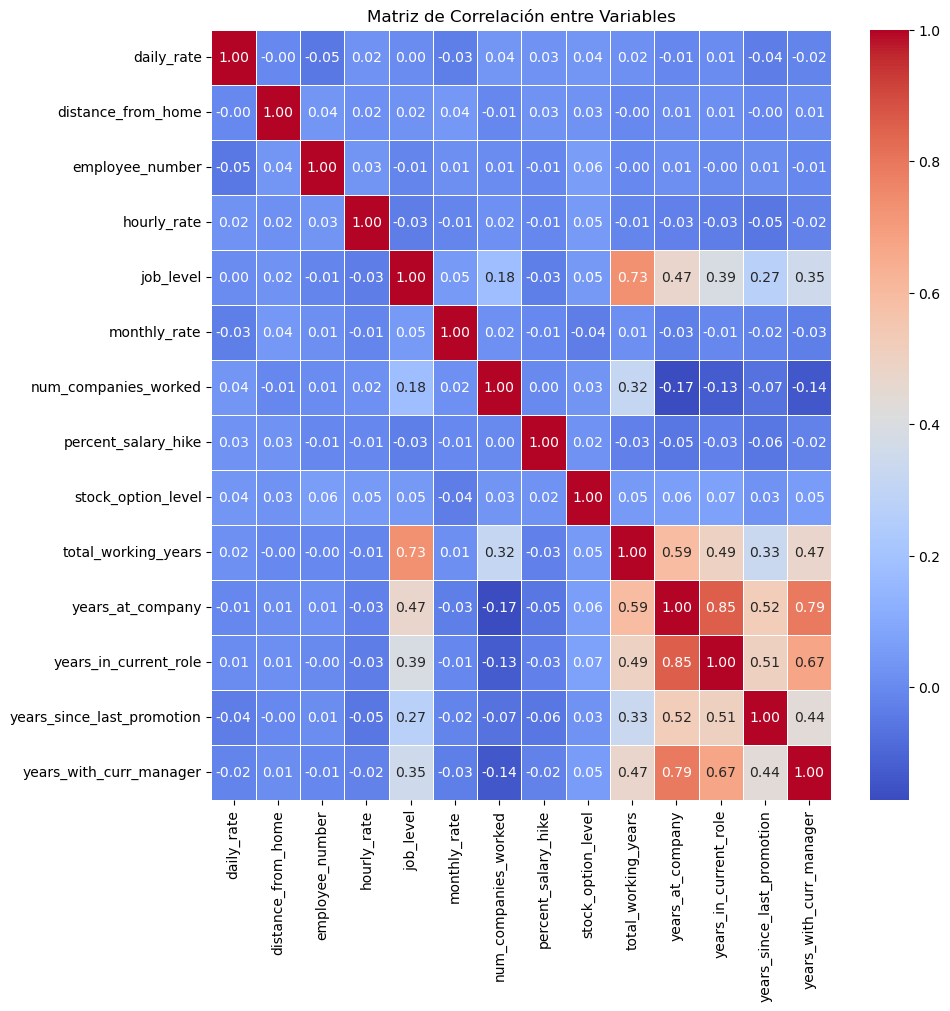

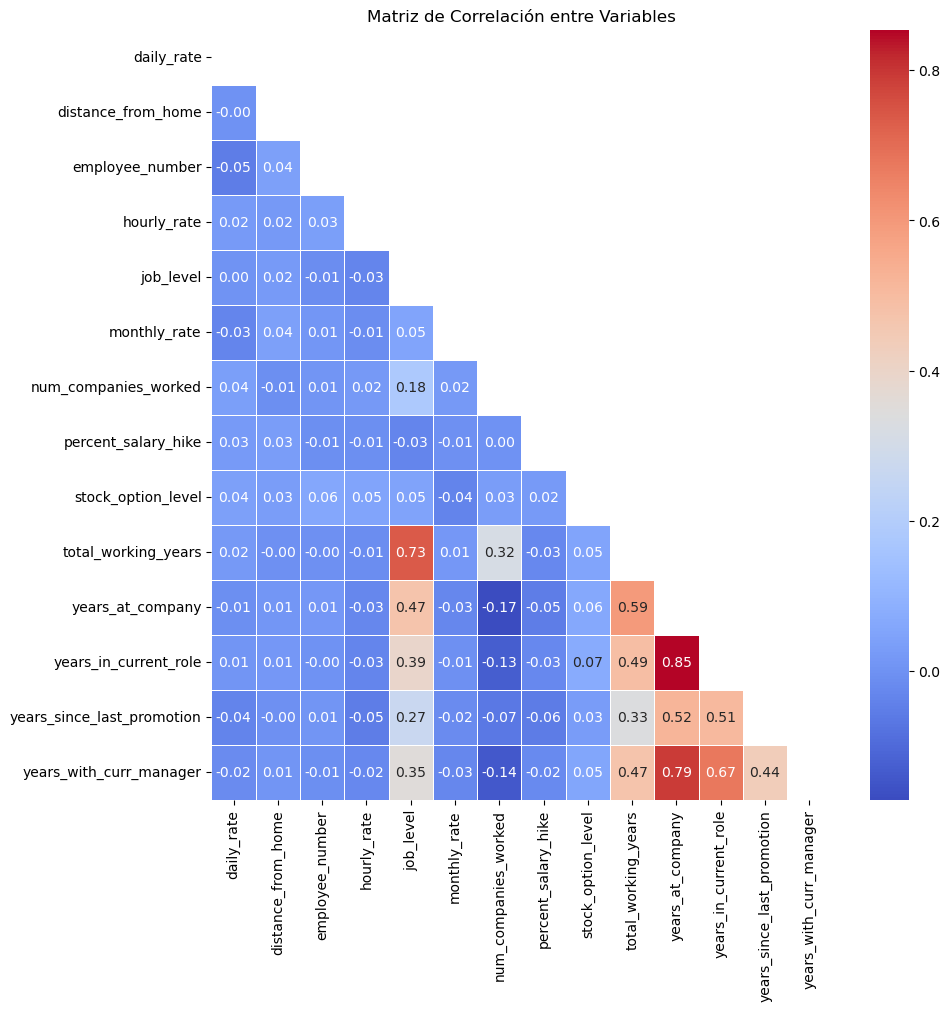

In [ ]:
correlation_matrix = df_final.select_dtypes(include="number").corr(method="spearman")

# Visualiza la matriz de correlación utilizando seaborn
plt.figure(figsize=(10,10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Añade título
plt.title('Matriz de Correlación entre Variables')

# Muestra el gráfico

plt.show()



mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# Crear una máscara para mostrar sólo la parte superior de la matriz
#mask = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, mask = mask, cmap='coolwarm', fmt='.2f', linewidths=.5)
# Añade título
plt.title('Matriz de Correlación entre Variables')
# Muestra el gráfico

plt.show()

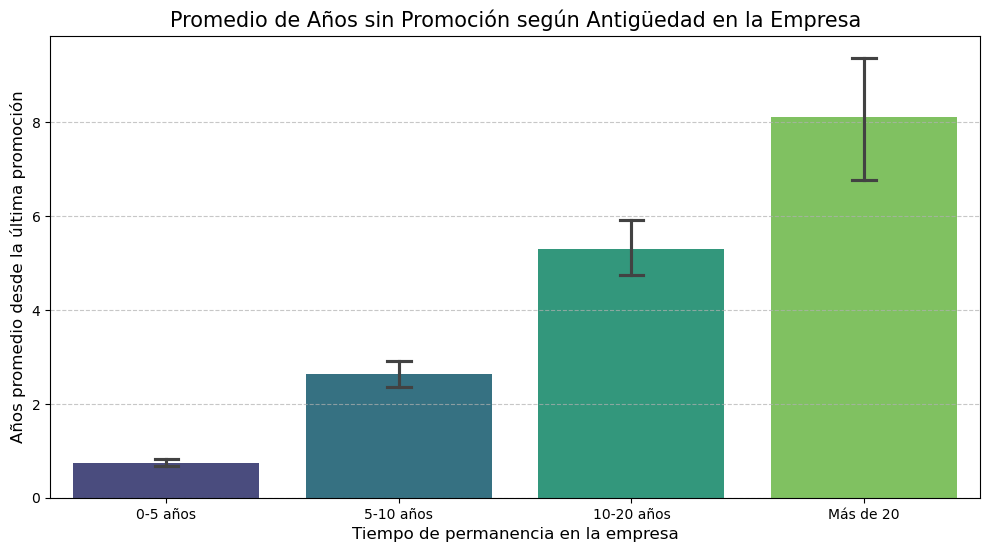

In [ ]:
# 1. Creamos rangos de antigüedad para que sea más fácil de leer
df_final['rango_antiguedad'] = pd.cut(df_final['years_at_company'], 
                                     bins=[0, 5, 10, 20, 40], 
                                     labels=['0-5 años', '5-10 años', '10-20 años', 'Más de 20'])

# 2. Creamos el gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=df_final, x='rango_antiguedad', y='years_since_last_promotion', 
            palette='viridis', capsize=.1)

plt.title('Promedio de Años sin Promoción según Antigüedad en la Empresa', fontsize=15)
plt.xlabel('Tiempo de permanencia en la empresa', fontsize=12)
plt.ylabel('Años promedio desde la última promoción', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()

# Análisis de Estancamiento Laboral

Esta gráfica de barras es una de las más reveladoras para un departamento de Recursos Humanos, ya que mide directamente el estancamiento laboral.

Aquí tienes la explicación detallada de lo que nos está diciendo:

---

### 1. ¿Qué representan los ejes?

* **Eje (Horizontal):** Agrupa a los empleados por su "edad" dentro de la empresa (tenure). Va desde los recién llegados (0-5 años) hasta los veteranos (más de 20 años).
* **Eje (Vertical):** Representa la media de años que han pasado desde que el empleado recibió su última promoción.

---

### 2. La Tendencia Principal: "El efecto acumulativo"

La gráfica muestra una escalera ascendente clara. Esto es lógico, pero nos da un dato interesante:

* En los primeros 5 años, la gente suele promocionar rápido (el promedio de espera es de menos de 1 año).
* Sin embargo, al permanecer 10-20 años en la empresa, el tiempo de espera se dispara a más de 5 años.
* Para los veteranos (más de 20 años), la espera media supera los 8 años.

Las líneas en la parte superior de cada barra indican la variabilidad o incertidumbre de los datos:

* En el grupo de 0-5 años, la línea es muy pequeña. Esto significa que casi todos los empleados nuevos viven la misma experiencia: promocionan rápido.
* En el grupo de Más de 20 años, la línea es mucho más larga. Esto indica que hay mucha desigualdad ya que algunos veteranos han promocionado hace poco, pero otros llevan aproximadamente 15 años en el mismo puesto, lo que ensancha el margen (outliers).

---

### 3. Conclusión:

La gráfica sugiere que la empresa tiene un **techo de cristal** o un embudo en las posiciones intermedias y senior. Mientras que el talento joven se mueve rápido, el talento con experiencia parece quedarse "atrapado" en sus roles por mucho más tiempo.

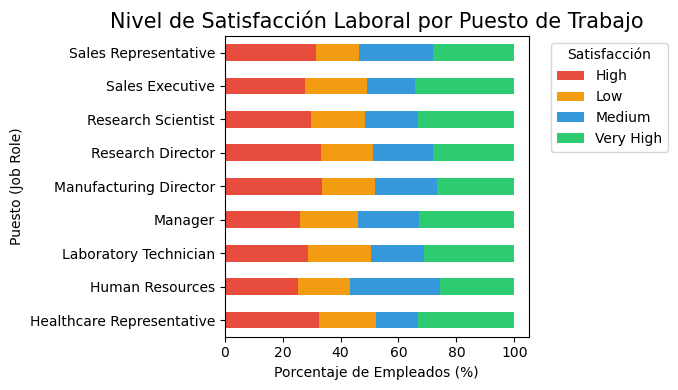

In [ ]:
# 1. Creamos una tabla de porcentajes para comparar roles de distintos tamaños
rol_satisfaccion = pd.crosstab(df_final['job_role'], df_final['job_satisfaction'], normalize='index') * 100

# 2. Graficamos
rol_satisfaccion.plot(kind='barh', stacked=True, figsize=(7,4), 
                      color=['#e74c3c', '#f39c12', '#3498db', '#2ecc71'])

plt.title('Nivel de Satisfacción Laboral por Puesto de Trabajo', fontsize=15)
plt.xlabel('Porcentaje de Empleados (%)')
plt.ylabel('Puesto (Job Role)')
plt.legend(title='Satisfacción', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

🚧🚧🚧🚧🚧🚧🚧🚧🚧🚧🚧🚧🚧🚧🚧🚧🚧🚧🚧🚧🚧🚧🚧🚧
# Análisis de Satisfacción por Puesto de Trabajo

Esta visualización de barras apiladas muestra la distribución porcentual de los niveles de **Satisfacción Laboral** dentro de cada **Puesto de Trabajo** (Job Role).

### 1. ¿Qué representan los ejes?

* **Eje (Horizontal):** Representa el porcentaje acumulado (0-100%) de empleados dentro de cada rol, segmentado por colores según su nivel de satisfacción.
* **Eje (Vertical):** Lista los diferentes puestos de trabajo (Job Roles) presentes en la empresa.

---

### 2. Tendencias Principales

La gráfica permite comparar la "felicidad" relativa entre departamentos de forma equitativa:

* **Homogeneidad en la insatisfacción:** La proporción de empleados con satisfacción **"Low"** (naranja) es muy similar en casi todos los puestos, rondando entre el 15% y el 20%. Esto sugiere que la insatisfacción no está ligada a un rol específico.
* **Puestos con mayor entusiasmo:** Si sumamos las categorías **"High"** (rojo) y **"Very High"** (verde), roles como *Sales Representative*, *Healthcare Representative* y *Research Director* muestran el personal más comprometido.
* **Neutralidad en RR.HH.:** El puesto de *Human Resources* presenta la barra de satisfacción **"Medium"** (azul) más ancha, indicando un estado de conformidad intermedia en este equipo.

---

### 3. Conclusión:

La gráfica sugiere que la empresa goza de una salud laboral estable en todos sus niveles, ya que no hay un "puesto crítico" con descontento mayoritario. Sin embargo, existe una oportunidad de mejora para convertir el grueso de satisfacción "Medium" y "High" en niveles "Very High" mediante políticas de motivación específicas por departamento.

In [ ]:
df_final.columns

Index(['age', 'attrition', 'business_travel', 'daily_rate', 'department',
       'distance_from_home', 'education', 'education_field', 'employee_number',
       'environment_satisfaction', 'gender', 'hourly_rate', 'job_involvement',
       'job_level', 'job_role', 'job_satisfaction', 'marital_status',
       'monthly_income', 'monthly_rate', 'num_companies_worked', 'over_time',
       'percent_salary_hike', 'performance_rating',
       'relationship_satisfaction', 'stock_option_level',
       'total_working_years', 'training_times_last_year', 'work_life_balance',
       'years_at_company', 'years_in_current_role',
       'years_since_last_promotion', 'years_with_curr_manager'],
      dtype='object')

## Análisis de Equidad de Género y Condiciones Laborales

En esta sección se analiza si existen diferencias en oportunidades de crecimiento,compensación y bienestar laboral en función del género, con el objetivo de detectar posibles desigualdades estructurales dentro de la empresa.


## Objetivo del análisis

##### Evaluar si existen diferencias significativas entre hombres y mujeres en:

- Acceso a promociones
- Nivel jerárquico
- Incrementos salariales

Con el fin de detectar posibles desigualdades de género y proponer mejoras en las políticas de Recursos Humanos.

#### Variables utilizadas

Para este análisis se utilizan las siguientes variables del dataset:

- `Gender`: género del empleado.
- `YearsSinceLastPromotion`: años desde la última promoción.
- `JobLevel`: nivel jerárquico del puesto.
- `PercentSalaryHike`: porcentaje de incremento salarial.


***


### Análisis 1: Género y acceso a promociones


Se analiza si existen diferencias entre hombres y mujeres en el tiempo medio transcurrido desde la última promoción, como indicador del acceso a oportunidades de crecimiento dentro de la empresa.


In [ ]:
df = pd.read_csv("hr.csv")


df.head()



,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,sALES eXECUTIVE,4.0,Single,5993.0,19479,8,Y,Yes,11,3,1,80.0,0,8,0.0,1,6,4,0,5.0
1,49.0,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,rESEARCH sCIENTIST,2.0,Married,5130.0,24907,1,Y,No,23,4,4,NaN,1,10,3.0,3,10,7,1,7.0
2,37.0,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,lABORATORY tECHNICIAN,3.0,Single,2090.0,2396,6,Y,Yes,15,3,2,NaN,0,7,3.0,3,0,0,0,0.0
3,33.0,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,rESEARCH sCIENTIST,3.0,Married,2909.0,23159,1,Y,Yes,11,3,3,80.0,0,8,3.0,3,8,7,3,0.0
4,27.0,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,lABORATORY tECHNICIAN,2.0,Married,3468.0,16632,9,Y,No,12,3,4,80.0,1,6,3.0,3,2,2,2,2.0


In [ ]:
# Calculamos la media de años desde la última promoción por género

promotion_by_gender = (
    df.groupby('Gender')['YearsSinceLastPromotion']
      .mean()
      .reset_index()
)

promotion_by_gender

,Gender,YearsSinceLastPromotion
0,Female,2.292020
1,Male,2.110734


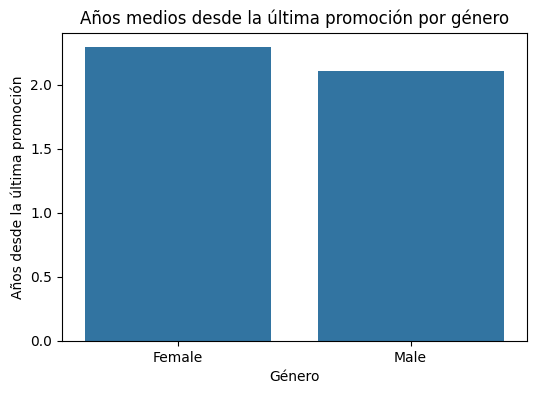

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=promotion_by_gender,
    x='Gender',
    y='YearsSinceLastPromotion'
)

plt.title('Años medios desde la última promoción por género')
plt.xlabel('Género')
plt.ylabel('Años desde la última promoción')
plt.show()


### Conclusión


Al analizar la gráfica de "Años medios desde la última promoción por género", se observa una métrica clave para entender la velocidad de crecimiento dentro de la organización.

Esta métrica evalúa el tiempo promedio que transcurre antes de que un empleado reciba un ascenso, segmentado por género.

Mujeres (Female): Aproximadamente 2.3 años.

Hombres (Male): Aproximadamente 2.1 años.

Existe una ligera disparidad en los tiempos de promoción. En promedio, las mujeres esperan cerca de un 10% más de tiempo que sus compañeros masculinos para ser promocionadas. Aunque la diferencia absoluta es pequeña (aprox. 0.2 años), es un indicador que merece atención para asegurar que el desarrollo de carrera sea totalmente equitativo.

### Recomendaciones Estratégicas:

Auditoría de Promociones: Se recomienda revisar los criterios de evaluación de desempeño para asegurar que sean 100% objetivos y no existan sesgos inconscientes que retrasen el avance del talento femenino.

Programas de Mentoría: Implementar iniciativas de acompañamiento para mujeres en niveles medios (donde ya vimos que tienen un JobLevel alto) para acelerar su transición hacia puestos de mayor responsabilidad.

Análisis por Departamento: Sería ideal desglosar estos datos por áreas; a veces una brecha general es causada por un solo departamento con prácticas menos inclusivas.


***


### Análisis 2: Género, nivel jerárquico e incremento salarial

#### En este análisis se estudia si existen diferencias de género en:

- El nivel jerárquico alcanzado dentro de la empresa.

- El porcentaje de incremento salarial recibido.


El objetivo es detectar posibles desigualdades en la progresión profesional
y en la compensación económica entre hombres y mujeres.


### Variables utilizadas

- `Gender`: género del empleado.
- `JobLevel`: nivel jerárquico del puesto (a mayor valor, mayor responsabilidad).
- `PercentSalaryHike`: porcentaje de incremento salarial.


### Análisis 2.1: Género y nivel jerárquico

Pregunta de negocio:
¿Existen diferencias entre hombres y mujeres en el nivel jerárquico medio
que alcanzan dentro de la empresa?


In [ ]:
joblevel_by_gender = (
    df.groupby('Gender')['JobLevel']
      .mean()
      .reset_index()
)

joblevel_by_gender


,Gender,JobLevel
0,Female,2.117148
1,Male,2.028249


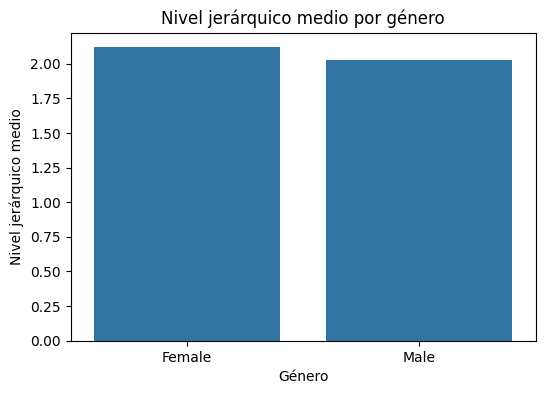

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=joblevel_by_gender,
    x='Gender',
    y='JobLevel'
)

plt.title('Nivel jerárquico medio por género')
plt.xlabel('Género')
plt.ylabel('Nivel jerárquico medio')
plt.show()


### Conclusión:

Los datos revelan una equidad sustancial en la jerarquía de la empresa. De hecho, el talento femenino presenta un nivel jerárquico medio ligeramente superior (0.089 puntos por encima) al masculino.

Interpretación para RRHH:

Acceso a Oportunidades: No se detecta un "techo de cristal" inmediato en los niveles medios, ya que ambos géneros orbitan el nivel 2 de forma equilibrada.

Retención de Talento: La paridad en el JobLevel sugiere que las políticas de promoción interna se están aplicando con criterios objetivos, logrando una distribución equitativa de las responsabilidades.

### Análisis 2.2: Género e incremento salarial

Pregunta de negocio:

¿Existen diferencias en el porcentaje de incremento salarial entre hombres
y mujeres dentro de la empresa?


In [ ]:
salary_hike_by_gender = (
    df.groupby('Gender')['PercentSalaryHike']
      .mean()
      .reset_index()
)

In [ ]:
salary_hike_by_gender

,Gender,PercentSalaryHike
0,Female,15.190153
1,Male,15.218079


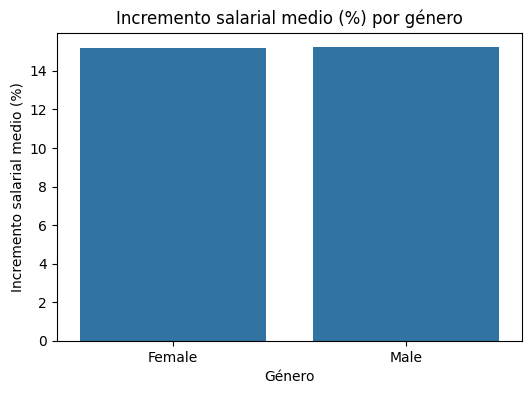

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=salary_hike_by_gender,
    x='Gender',
    y='PercentSalaryHike'
)

plt.title('Incremento salarial medio (%) por género')
plt.xlabel('Género')
plt.ylabel('Incremento salarial medio (%)')
plt.show()


### Conclusión

Tras analizar el porcentaje de incremento salarial (PercentSalaryHike) desglosado por género, los resultados son los siguientes:

Mujeres (Female): 15.19%

Hombres (Male): 15.21%

Interpretación de los hallazgos:

Paridad Salarial: La diferencia entre ambos géneros es de apenas un 0.02%, lo que representa una igualdad prácticamente perfecta en las políticas de aumento salarial de la compañía.

Criterios Objetivos: Esta similitud tan estrecha sugiere que los incrementos se basan en méritos, rendimiento o escalas preestablecidas, sin sesgos de género detectables en esta métrica.

Salud Organizacional: Para el departamento de RRHH, este es un indicador clave de éxito en materia de igualdad de oportunidades, reforzando una cultura empresarial justa y transparente.



***


### Análisis 3: Género, antigüedad y progresión jerárquica

En los análisis anteriores se ha observado que el nivel jerárquico medio es
muy similar entre hombres y mujeres. Sin embargo, este indicador por sí solo
no permite evaluar si ambos géneros alcanzan dichos niveles con la misma
velocidad de promoción.

Por ello, en este análisis se cruza el nivel jerárquico con la antigüedad
en la empresa, con el objetivo de evaluar la progresión profesional de
hombres y mujeres a lo largo del tiempo.


### Variables utilizadas

- `Gender`: género del empleado.
- `YearsAtCompany`: años de antigüedad en la empresa.
- `JobLevel`: nivel jerárquico del puesto.


In [ ]:
# Definimos tramos de antigüedad
bins = [0, 5, 10, 15, 20, df['YearsAtCompany'].max()]
labels = ['0-5 años', '6-10 años', '11-15 años', '16-20 años', 'Más de 20 años']

df['TenureGroup'] = pd.cut(
    df['YearsAtCompany'],
    bins=bins,
    labels=labels,
    right=True
)

df[['YearsAtCompany', 'TenureGroup']].head()


,YearsAtCompany,TenureGroup
0,6,6-10 años
1,10,6-10 años
2,0,NaN
3,8,6-10 años
4,2,0-5 años


In [ ]:
joblevel_tenure_gender = (
    df.groupby(['TenureGroup', 'Gender'])['JobLevel']
      .mean()
      .reset_index()
)

joblevel_tenure_gender


,TenureGroup,Gender,JobLevel
0,0-5 años,Female,1.752613
1,0-5 años,Male,1.665924
2,6-10 años,Female,2.143678
3,6-10 años,Male,2.131387
4,11-15 años,Female,2.588235
5,11-15 años,Male,2.263158
6,16-20 años,Female,3.157895
7,16-20 años,Male,3.088235
8,Más de 20 años,Female,3.875000
9,Más de 20 años,Male,4.476190


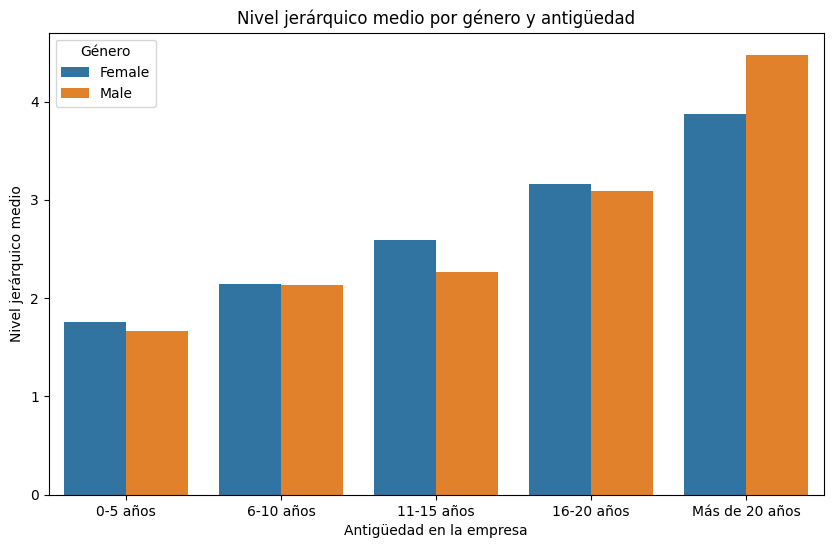

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=joblevel_tenure_gender,
    x='TenureGroup',
    y='JobLevel',
    hue='Gender'
)

plt.title('Nivel jerárquico medio por género y antigüedad')
plt.xlabel('Antigüedad en la empresa')
plt.ylabel('Nivel jerárquico medio')
plt.legend(title='Género')
plt.show()


### Conclusión

Evolución de la Carrera Profesional (Género vs. Antigüedad)
Este gráfico de barras agrupadas permite visualizar si el crecimiento jerárquico dentro de la empresa sigue un ritmo equitativo a medida que los empleados acumulan años de experiencia.

0-15 años de antigüedad: El talento femenino mantiene un nivel jerárquico medio ligeramente superior al masculino en todos los tramos iniciales.

16-20 años de antigüedad: Se observa una paridad casi absoluta, con las mujeres manteniendo una mínima ventaja en el nivel de puesto.

Más de 20 años de antigüedad: Es el único segmento donde el nivel jerárquico masculino supera claramente al femenino, alcanzando el nivel más alto de la gráfica (cercano al nivel 4.5).

### Conclusiones Clave para RRHH:

Liderazgo Femenino Consistente: En las primeras dos décadas de carrera, las mujeres no solo compiten en igualdad, sino que alcanzan niveles jerárquicos ligeramente superiores a sus compañeros con la misma antigüedad.

El Techo de Cristal Tardío: La brecha que aparece a partir de los 20 años de antigüedad sugiere que, históricamente, los puestos de altísima dirección (Nivel 4-5) han sido ocupados mayoritariamente por hombres. Esto podría deberse a dinámicas de promociones de hace décadas que aún se reflejan en la plantilla más veterana.

Tendencia de Cambio: La superioridad del nivel femenino en los tramos más jóvenes (0-15 años) indica que las políticas actuales de equidad están funcionando y que las futuras promociones a la alta dirección probablemente sean mucho más equilibradas.

Recomendación: Focalizar los planes de sucesión para los puestos de máximo nivel en las mujeres que se encuentran actualmente en el tramo de 16-20 años, para cerrar la brecha histórica detectada en el segmento de más de 20 años de antigüedad.
